1. Проведите предварительный анализ и подготовку данных, обработайте
пропущенные значения

In [316]:
import pandas as pd

df = pd.read_csv('regression_var4.csv', sep=';', names=list(map(str, list(range(1, 8)))) + ['target'])
df.head()

,1,2,3,4,5,6,7,target
0,0.323710,0.929629,-0.767670,1.116340,-0.070416,-0.096773,-1.341757,88.929263
1,-2.653632,-0.812825,0.747477,NaN,-0.073235,-0.447236,-0.308805,-111.970141
2,-1.012406,-0.014101,NaN,-0.821736,0.129890,1.606278,0.284032,-40.252999
3,-0.633402,-0.549693,NaN,0.170157,-0.516859,-0.303740,1.429740,-11.120857
4,1.127122,-0.792454,NaN,0.064311,-0.070108,-1.234200,-1.306032,-33.972466


In [317]:
# смотрим пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       100 non-null    float64
 1   2       100 non-null    float64
 2   3       30 non-null     float64
 3   4       95 non-null     float64
 4   5       100 non-null    float64
 5   6       100 non-null    float64
 6   7       100 non-null    float64
 7   target  100 non-null    float64
dtypes: float64(8)
memory usage: 6.4 KB


In [318]:
# т.к третий признак имеется только у 30% семплов, удалим этот столбец
df.drop('3', axis=1, inplace=True)
df = df.dropna()

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       95 non-null     float64
 1   2       95 non-null     float64
 2   4       95 non-null     float64
 3   5       95 non-null     float64
 4   6       95 non-null     float64
 5   7       95 non-null     float64
 6   target  95 non-null     float64
dtypes: float64(7)
memory usage: 5.9 KB


2. Проведите статистический анализ, оцените корреляции между признаками, оцените
возможные выбросы в данных, постройте поясняющие графики. Удалите из
рассмотрения признаки, которые не влияют на целевой.

<AxesSubplot:>

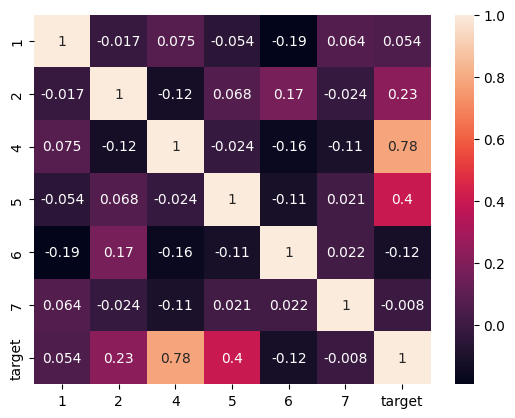

In [320]:
import seaborn as sb

sb.heatmap(df.corr(), annot = True)

Седьмой признак практически не кореллирует с целевым, удаляем

In [321]:
df = df.drop('7', axis=1)

Проверим датасет на выбросы

<AxesSubplot:>

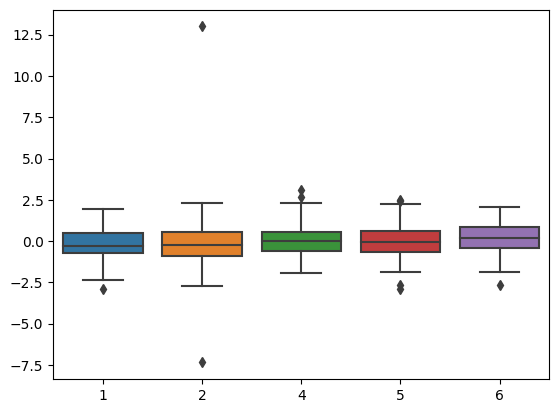

In [322]:
sb.boxplot(data=df.drop('target', axis=1))

Видим большой разброс у второго признака, удалим эти строки

In [323]:
df = df.loc[df['2'] < 2.5]
df = df.loc[df['2'] > -2.5]

<AxesSubplot:>

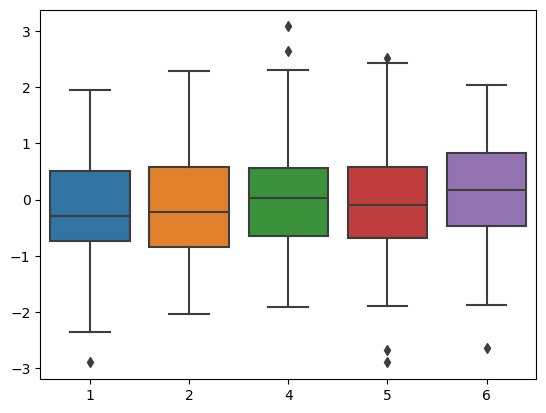

In [324]:
sb.boxplot(data=df.drop('target', axis=1))

3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

4. Для предсказания целевого признака постройте следующие модели, используя
библиотеку sklearn

### LinearRegression

In [326]:
from sklearn.linear_model import LinearRegression, LogisticRegression

lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.9908978736435587

### RandomForestRegressor

In [327]:
from sklearn.ensemble import RandomForestRegressor

# params = {
#     'max_depth': list(range(20, 30)),
#     'n_estimators': list(range(50, 201, 10))
# }
# rfr = RandomForestRegressor()
# grid = GridSearchCV(rfr, params).fit(X_train, y_train)
# grid.best_estimator_
# лучшие показатели grid                 v             v
rfr = RandomForestRegressor(n_estimators=70, max_depth=29).fit(X_train, y_train)
print(rfr.feature_importances_)
rfr.score(X_test, y_test)

[0.01859613 0.14075352 0.68764617 0.12757931 0.02542487]


0.7968696739100727

### KNeighborsRegressor

In [328]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

params = {
    'n_neighbors': list(range(2, 7)),
    'p': np.linspace(1, 10, 200)
}

knr = KNeighborsRegressor(weights='distance')
grid = GridSearchCV(knr, params).fit(X_train, y_train)
grid.best_estimator_

KNeighborsRegressor(n_neighbors=4, p=2.6733668341708543, weights='distance')

In [329]:
# точность с параметрами по умолчанию - 0.67
knr = KNeighborsRegressor(n_neighbors=4, weights='distance', p=2.6733).fit(X_train, y_train)
knr.score(X_test, y_test)

0.7228054213924251

### SVR

In [330]:
from sklearn.svm import SVR

# при стандартной регуляризации (C=1) точность - 0.05
svr = SVR(C=450).fit(X_train, y_train)
svr.score(X_test, y_test)

0.8245153306003328